In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!ls /content/drive/My\ Drive/colab/titanic

gender_submission.csv  test.csv  train.csv  y_test15.csv


In [3]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [ ]:
import os
import random
import math
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/drive/My Drive/colab/titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/colab/titanic/test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Survived

In [8]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

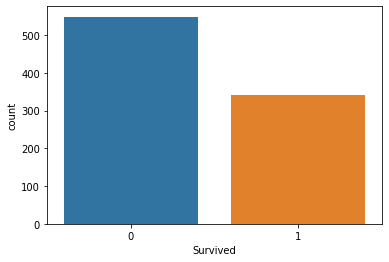

In [9]:
sns.countplot(train['Survived'])

# Pclass

In [10]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

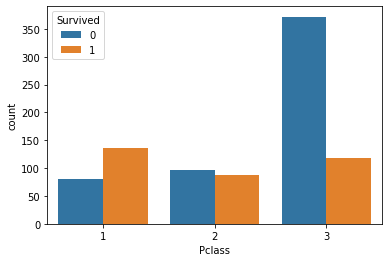

In [11]:
sns.countplot(train['Pclass'], hue=train['Survived'])

# Name


In [12]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [13]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Sir.           1
Mme.           1
Ms.            1
Don.           1
the            1
Capt.          1
Lady.          1
Jonkheer.      1
Name: Name_Title, dtype: int64

In [14]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

In [15]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [16]:
pd.qcut(train['Name_Len'],5).value_counts()

(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64

# Sex

In [17]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [18]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

# Age

In [19]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [20]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [21]:
pd.qcut(train['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

# SibSp

In [22]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [23]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

# Parch

In [24]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [25]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Ticket

In [26]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [ ]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [28]:
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [ ]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])

In [30]:
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [31]:
train.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

# Fare

In [32]:
pd.qcut(train['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [33]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

In [34]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


# Cabin

In [ ]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [36]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [37]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [ ]:
train['Cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train['Cabin_num'].replace('an', np.NaN, inplace = True)
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

In [39]:
pd.qcut(train['Cabin_num'],3).value_counts()

(65.667, 148.0]     67
(1.999, 28.667]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [40]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [41]:
train['Survived'].corr(train['Cabin_num'])

-0.06384595922789371

# Embarked

In [42]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [44]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

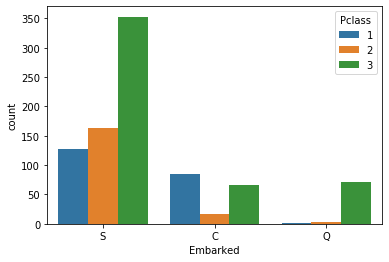

In [45]:
sns.countplot(train['Embarked'], hue=train['Pclass'])

# Feature Engineering

In [ ]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

In [ ]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

In [ ]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

In [ ]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

In [ ]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [ ]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

In [ ]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [ ]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [ ]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [ ]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [ ]:
train = pd.read_csv('/content/drive/My Drive/colab/titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/colab/titanic/test.csv')
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = fam_size(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = drop(train, test)

In [57]:
print(len(train.columns))

45


# Import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import time

# Hill Climbing Algorithm

<h3> Find better n_estimators

In [ ]:
def parameterByHC():
  best_oob = 0
  n_esti = 100
  rf = RandomForestClassifier(criterion='gini', 
                              n_estimators = 100,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features='auto',
                              oob_score=True,
                              random_state=1,
                              n_jobs=-1)
  rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
  best_oob = rf.oob_score_
  print("default: " + str(best_oob))
  
  for i in range(101,1001):
    rf = RandomForestClassifier(criterion='gini', 
                              n_estimators = i,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features='auto',
                              oob_score=True,
                              random_state=1,
                              n_jobs=-1)
    rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
    oob = rf.oob_score_
    if best_oob > oob:
      continue
    best_oob = oob
    n_esti = i

  return best_oob, n_esti

In [63]:
bestoob_in_Nesti, n_esti = parameterByHC()

default: 0.8260381593714927


In [64]:
print(str(bestoob_in_Nesti) + " : " + str(n_esti))

0.8395061728395061 : 683


<h3> Find better min_samples_split & min_samples_leaf

In [ ]:
def twoParameterByHC(n_esti):
  best_split = 0
  best_leaf = 0
  flag = 0
  rdn1 = random.randint(2,101)
  rdn2 = random.randint(1,101)
  rf = RandomForestClassifier(criterion='gini', 
                              n_estimators = n_esti,
                              min_samples_split = rdn1,
                              min_samples_leaf = rdn2,
                              max_features='auto',
                              oob_score=True,
                              random_state=1,
                              n_jobs=-1)
  rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
  best_oob = rf.oob_score_
  best_split = rdn1
  best_leaf = rdn2
  print('Origin' + ' : ' + str(best_oob) + ', best_split ' + str(rdn1) + ' , ' +  'best_leaf ' + str(rdn2) + '\n')

  for i in range(10):      #iteration
    print('Round' + str(i))
    rdn1 = random.randint(2,101)
    rdn2 = random.randint(1,101)
    if i == 5:
      rdn1 = 2
      rdn2 = 1
    print('rdn1 ' + str(rdn1) + ' , ' + 'rdn2 ' + str(rdn2) + '\n')
    rf = RandomForestClassifier(criterion='gini', 
                              n_estimators = n_esti,
                              min_samples_split = rdn1,
                              min_samples_leaf = rdn2,
                              max_features='auto',
                              oob_score=True,
                              random_state=1,
                              n_jobs=-1)
    rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
    oob = rf.oob_score_
    if best_oob < oob:
      best_oob = oob
      best_split = rdn1
      best_leaf = rdn2
    print('best_oob: ' + str(best_oob))

    while(True):
      if flag == 10:
        break
      rdn1 += 1
      rf = RandomForestClassifier(criterion='gini', 
                              n_estimators = n_esti,
                              min_samples_split = rdn1,
                              min_samples_leaf = rdn2,
                              max_features='auto',
                              oob_score=True,
                              random_state=1,
                              n_jobs=-1)
      rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
      oob = rf.oob_score_
      if best_oob > oob:
        flag += 1
        continue
      best_oob = oob
      best_split = rdn1
    print('After while1 => ' + 'best_oob: ' + str(best_oob) + ', best_split: ' + str(best_split) + ', best_leaf: ' + str(best_leaf))
    flag = 0

    while(True):
      if flag == 10:
        break
      rdn2 += 1
      rf = RandomForestClassifier(criterion='gini', 
                              n_estimators = n_esti,
                              min_samples_split = best_split,
                              min_samples_leaf = rdn2,
                              max_features='auto',
                              oob_score=True,
                              random_state=1,
                              n_jobs=-1)
      rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
      oob = rf.oob_score_
      if best_oob > oob:
        flag += 1
        continue
      best_oob = oob
      best_leaf = rdn2
    print('After while2 => ' + 'best_oob: ' + str(best_oob) + ', best_split: ' + str(best_split) + ', best_leaf: ' + str(best_leaf))
    print('\n')
  return best_split, best_leaf, best_oob

In [75]:
HCstart = time.time()
HCbest_split, HCbest_leaf, HCbest_oobb = twoParameterByHC(n_esti)
HCend = time.time()

Origin : 0.7822671156004489, best_split 19 , best_leaf 91

Round0
rdn1 18 , rdn2 59

best_oob: 0.7878787878787878
After while1 => best_oob: 0.7878787878787878, best_split: 135, best_leaf: 59
After while2 => best_oob: 0.7890011223344556, best_split: 135, best_leaf: 69


Round1
rdn1 87 , rdn2 27

best_oob: 0.7890011223344556
After while1 => best_oob: 0.7890011223344556, best_split: 135, best_leaf: 69
After while2 => best_oob: 0.7890011223344556, best_split: 135, best_leaf: 69


Round2
rdn1 14 , rdn2 22

best_oob: 0.8080808080808081
After while1 => best_oob: 0.8080808080808081, best_split: 14, best_leaf: 22
After while2 => best_oob: 0.8080808080808081, best_split: 14, best_leaf: 22


Round3
rdn1 2 , rdn2 25

best_oob: 0.8080808080808081
After while1 => best_oob: 0.8080808080808081, best_split: 14, best_leaf: 22
After while2 => best_oob: 0.8080808080808081, best_split: 14, best_leaf: 22


Round4
rdn1 35 , rdn2 95

best_oob: 0.8080808080808081
After while1 => best_oob: 0.8080808080808081, b

In [76]:
print(str(HCbest_oobb) + " : " + " min_samples_split -> " + str(HCbest_split) + " ," + " min_samples_leaf -> " + str(HCbest_leaf))
print('Period: ' + str(HCend-HCstart) + ' sec')

0.8395061728395061 :  min_samples_split -> 2 , min_samples_leaf -> 1
Period: 378.2757008075714 sec


# Genetic Algorithm



In [ ]:
def ran(domain, leng): # generate two numbers  that in range to  swap  (ex: if answer is [4,7] means city 4 and city 7 seq. order swap)
    num = []
    ok_flag=0
    First = random.randint(1,domain)%leng
    num.append(First)
    Second = random.randint(1,domain)%leng
    
    while(ok_flag==0):
        if Second in num:
            Second=random.randint(1,domain)%leng
        else:
            num.append(Second)
            ok_flag=1
    
    return num

In [ ]:
def twoParameterByGA(n_esti):
  parent = []
  child = []
  best_oob = 0
  best_split = 0
  best_leaf = 0
  mu_flag = 0
  m_rate = 0.087

  # iteration
  for i in range(10):
    print('Round ' + str(i))
    # parents rdn1, rdn2
    parent1 = []
    parent1.append(random.randint(2,101))
    parent1.append(random.randint(1,101))
    # parent1 = [6, 8]
    
    rf = RandomForestClassifier(criterion='gini', 
                                n_estimators = n_esti,
                                min_samples_split = parent1[0],
                                min_samples_leaf = parent1[1],
                                max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)
    rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
    parent1.append(round(rf.oob_score_, 4))
    print('parent1[0]: ' + str(parent1[0]) + ' , ' + 'parent1[1]: ' + str(parent1[1]) + ', oob: ' + str(parent1[2]))

    if best_oob < parent1[2]:
        best_oob = parent1[2]
        best_split = parent1[0]
        best_leaf = parent1[1]

    print('parent1'  + ' => ' + '  oob : ' + str(best_oob) + ', best_split: ' + str(best_split) + ', ' + ' best_leaf: ' + str(best_leaf))
    parent.append(parent1)
    print('\n')

    # children 
    parent2 = []
    parent2.append(random.randint(2,101))
    parent2.append(random.randint(1,101))
    # parent2 = [8, 10]
    rf = RandomForestClassifier(criterion='gini', 
                              n_estimators = n_esti,
                              min_samples_split = parent2[0],
                              min_samples_leaf = parent2[1],
                              max_features='auto',
                              oob_score=True,
                              random_state=1,
                              n_jobs=-1)
    rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
    parent2.append(round(rf.oob_score_, 4))
    print('parent2[0]: ' + str(parent2[0]) + ' , ' + 'parent2[1]: ' + str(parent2[1]) + ', oob: ' + str(parent2[2]))
    if best_oob < parent2[2]:
      best_oob = parent2[2]
      best_split = parent2[0]
      best_leaf = parent2[1]
    print('parent2' + ' => ' + '  oob : ' + str(best_oob) + ', best_split: ' + str(best_split) + ', ' + ' best_leaf: ' + str(best_leaf))
    parent.append(parent2)

    print(parent)
    

    # find index to crossover
    list_cross = []
    #print(len(parent))
    for j in range(int(len(parent)/2)):
      index = ran(100, len(parent))
      #print(index[0],index[1])
        
      list_tmp = []
      list_tmp.append( [parent[index[0]][0], parent[index[1]][1]] )
      child.append(list_tmp)

      list_tmp = []
      list_tmp.append([ parent[index[1]][0], parent[index[0]][1] ])
      child.append(list_tmp)
    print('\nchild:')
    print(child)
    print('\n\n')
 
  # crossover
  for k in range(len(child)):
    #print(str(child[k][0][0]),str(child[k][0][1]))
    rf = RandomForestClassifier(criterion='gini', 
                            n_estimators = n_esti,
                            min_samples_split = child[k][0][0],
                            min_samples_leaf = child[k][0][1],
                            max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)
    rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
    child[k][0].append(round(rf.oob_score_, 4))
  print(child)


  # Mutation
  for x in range(len(child)):
    if random.random() < m_rate:
      mu_flag = 1
      print('\nMutation :D')
      new = random.randint(2,101)
      child[x][0][1] = new
      rf = RandomForestClassifier(criterion='gini', 
                            n_estimators = n_esti,
                            min_samples_split = child[x][0][0],
                            min_samples_leaf = child[x][0][1],
                            max_features='auto',
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)
      rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
      child[x][0][2] = round(rf.oob_score_, 4)
  if mu_flag == 1:
    print(child)
  best_oob = child[0][0][2]
  best_split = child[0][0][0]
  best_leaf = child[0][0][1]

  for xx in range(len(child)):
    if child[xx][0][2] > best_oob:
      best_oob = child[xx][0][2]
      best_split = child[xx][0][0]
      best_leaf = child[xx][0][1]
  
  return best_split, best_leaf, best_oob

In [79]:
GAstart = time.time()
GAbest_split, GAbest_leaf, GAbest_oob = twoParameterByGA(n_esti)
GAend = time.time()

Round 0
parent1[0]: 83 , parent1[1]: 11, oob: 0.8159
parent1 =>   oob : 0.8159, best_split: 83,  best_leaf: 11


parent2[0]: 83 , parent2[1]: 15, oob: 0.8103
parent2 =>   oob : 0.8159, best_split: 83,  best_leaf: 11
[[83, 11, 0.8159], [83, 15, 0.8103]]

child:
[[[83, 15]], [[83, 11]]]



Round 1
parent1[0]: 2 , parent1[1]: 29, oob: 0.7924
parent1 =>   oob : 0.8159, best_split: 83,  best_leaf: 11


parent2[0]: 75 , parent2[1]: 59, oob: 0.7879
parent2 =>   oob : 0.8159, best_split: 83,  best_leaf: 11
[[83, 11, 0.8159], [83, 15, 0.8103], [2, 29, 0.7924], [75, 59, 0.7879]]

child:
[[[83, 15]], [[83, 11]], [[2, 15]], [[83, 29]], [[83, 29]], [[2, 15]]]



Round 2
parent1[0]: 87 , parent1[1]: 20, oob: 0.8036
parent1 =>   oob : 0.8159, best_split: 83,  best_leaf: 11


parent2[0]: 28 , parent2[1]: 1, oob: 0.8328
parent2 =>   oob : 0.8328, best_split: 28,  best_leaf: 1
[[83, 11, 0.8159], [83, 15, 0.8103], [2, 29, 0.7924], [75, 59, 0.7879], [87, 20, 0.8036], [28, 1, 0.8328]]

child:
[[[83, 15]], 

In [80]:
print('min_samples_split: ' + str(GAbest_split) + " ; " + 'min_samples_leaf: '  + str(GAbest_leaf) + " ; " + 'oob_score: ' + str(GAbest_oob))
print('Period: ' + str(GAend-GAstart) + ' sec')

min_samples_split: 2 ; min_samples_leaf: 1 ; oob_score: 0.8395
Period: 218.96920895576477 sec


# Model Estimation and Evaluation

In [81]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=10,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7856


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [82]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
2,Name_Len,0.140863
0,Age,0.131210
12,Sex_female,0.128734
1,Fare,0.097018
11,Sex_male,0.083497
8,Pclass_3,0.046345
33,Name_Title_Mr.,0.040105
7,Ticket_Len,0.032396
41,Fam_Size_Nuclear,0.022572
34,Name_Title_Mrs.,0.022496


In [ ]:
predictions = rf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('/content/drive/My Drive/colab/titanic/test.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('/content/drive/My Drive/colab/titanic/y_test15.csv', sep=",", index = False)

In [ ]:
predictions_csv = pd.read_csv('/content/drive/My Drive/colab/titanic/y_test15.csv')

In [85]:
predictions_csv.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,1
8,900,1
9,901,0
